In [6]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [7]:
HORIZON = 1000
#Arms are normally distributed with variance 1 and mean as follows

arm_means =  [-0.3, 0.0, 0.2, 0.3, 0.6]
arm_var = 1.0
n_arms = len(arm_means)

OPTIMAL_ARM = np.argmax(arm_means)

To compare the algorithms, I am using the same strategy. Each algorithm runs from timestep 1 to 1000 and I am simulating the algorithm 1000 times. Now to compare metrics at time step t, I am averaging the metric values over the simulations to have an idea of the true value the algorithm will produce. 

Metrics that are compared:

1) Average reward(averaged over simulations) at time step t.

2) Average pseudo regret as a function of t (pseudo regret/t averaged over simulations).

3) Number of times arm is chosen till time step t(averaged over simulations)

4) Number of times optimal arm is played till time step t(averaged over simulations) 

## Explore and Exploit

In [8]:
def choose_arm_explore_exploit(expected_rewards,T):
    #for first 10 timesteps choose arm 1, for next 10 timesteps choose arm 2 and so on till each arm is explored 10 timesteps
    #for next of the horizon choose arm with maximum expected reward
    
    if T<=10:
        return 0
    elif T<=20:
        return 1
    elif T<=30:
        return 2
    elif T<=40:
        return 3
    elif T<=50:
        return 4
    
    return np.argmax(expected_rewards) 


In [9]:
def get_reward(k):
    reward = np.random.normal(arm_means[k], arm_var)
    return reward

In [10]:
def explore_exploit():
    sum_rewards = [0] * n_arms
    expected_rewards = [0] * n_arms
    
    Nts = [0] * n_arms
    number_arms_played = np.zeros((HORIZON, n_arms))
    
    regrets = []
    rewards = []
    cumulative_reward = 0
    cumulative_regret = 0
    
    for T in range(1,HORIZON+1):
        
        #choose arm
        arm = choose_arm_explore_exploit(expected_rewards,T)       
        r = get_reward(arm)

        cumulative_reward +=r
        
        #rewards.append(cumulative_reward/T)
        rewards.append(r)
        
        sum_rewards[arm] += r
        Nts[arm] +=1
        expected_rewards[arm] = sum_rewards[arm]/Nts[arm]
        
        for arm in range(n_arms):
            number_arms_played[T-1,arm] = Nts[arm]
            
        pseudo_regret = arm_means[OPTIMAL_ARM] - r
        cumulative_regret += pseudo_regret
        
        pseudo_regret_t = cumulative_regret/T

        regrets.append(pseudo_regret_t)
        
    return (rewards, regrets, number_arms_played)

In [11]:
def test_explore_exploit(n_sims = 1000):
    sim_rewards = []
    sim_regrets = []
    sim_number_arms_played = []
    for sim in range(n_sims):
        rewards, regrets, number_arms_played = explore_exploit()
        sim_rewards.append(rewards)
        sim_regrets.append(regrets)
        sim_number_arms_played.append(number_arms_played)
        
    sim_rewards = np.array(sim_rewards)
    sim_regrets = np.array(sim_regrets)
    sim_number_arms_played = np.array(sim_number_arms_played)
    
    avg_rewards = np.mean(sim_rewards, axis = 0)
    avg_regrets = np.mean(sim_regrets, axis = 0)
    
    #print (sim_rewards.shape, sim_regrets.shape, sim_number_arms_played.shape)
    
    avg_arms_played = []
    for arm in range(n_arms):
        sims_arm_played_t = sim_number_arms_played[:,:,arm]
        avg_arm_played_t = np.mean(sims_arm_played_t, axis = 0)
        
        avg_arms_played.append(avg_arm_played_t)
        
    avg_arms_played = np.array(avg_arms_played)
    #print (avg_arms_played.shape)
       
    return (avg_rewards, avg_regrets, avg_arms_played)

In [12]:
rewards, regrets, avg_arms_played = test_explore_exploit(n_sims = 1000)
explore_exploit = {}
explore_exploit['rewards'] = rewards
explore_exploit['regrets'] = regrets
explore_exploit['avg_arms_played'] = avg_arms_played

## epsilon-greedy

In [14]:
def choose_arm_epsilon_greedy(expected_rewards, epsilon = 0.0):
    choice = np.random.uniform(0,1)
    
    explore = choice<epsilon
    
    if explore==False:
        return np.argmax(expected_rewards)
    else:
        i = random.choice(np.arange(len(arm_means)))
        
        return i

In [15]:
def epsilon_greedy(epsilon):
    sum_rewards = [0]*len(arm_means)
    expected_rewards = [0]* len(arm_means)
    
    Nts = [0]*len(arm_means)
    number_arms_played = np.zeros((HORIZON, n_arms))
    
    regrets = []
    rewards = []
    cumulative_reward = 0
    cumulative_regret = 0
    
    for T in range(1,HORIZON+1):
        r = 0
        
        #choose arm
        arm = choose_arm_epsilon_greedy(expected_rewards,epsilon)       
        r = get_reward(arm)

        cumulative_reward +=r
        
        #rewards.append(cumulative_reward/T)
        rewards.append(r)
        
        sum_rewards[arm] += r
        Nts[arm] +=1
        expected_rewards[arm] = sum_rewards[arm]/Nts[arm]
        
        for arm in range(n_arms):
            number_arms_played[T-1,arm] = Nts[arm]
            
        pseudo_regret = arm_means[OPTIMAL_ARM] - r
        cumulative_regret += pseudo_regret
        
        pseudo_regret_t = cumulative_regret/T
        regrets.append(pseudo_regret_t)
        
    return (rewards, regrets, number_arms_played)

In [16]:
def test_epsilon_greedy(epsilon, n_sims = 1000):
    sim_rewards = []
    sim_regrets = []
    sim_number_arms_played = []
    for sim in range(n_sims):
        rewards, regrets, number_arms_played = epsilon_greedy(epsilon)
        sim_rewards.append(rewards)
        sim_regrets.append(regrets)
        sim_number_arms_played.append(number_arms_played)
        
    sim_rewards = np.array(sim_rewards)
    sim_regrets = np.array(sim_regrets)
    sim_number_arms_played = np.array(sim_number_arms_played)
    
    avg_rewards = np.mean(sim_rewards, axis = 0)
    avg_regrets = np.mean(sim_regrets, axis = 0)
    
    #print (sim_rewards.shape, sim_regrets.shape, sim_number_arms_played.shape)
    
    avg_arms_played = []
    for arm in range(n_arms):
        sims_arm_played_t = sim_number_arms_played[:,:,arm]
        avg_arm_played_t = np.mean(sims_arm_played_t, axis = 0)
        
        avg_arms_played.append(avg_arm_played_t)
        
    avg_arms_played = np.array(avg_arms_played)
    #print (avg_arms_played.shape)
       
    return (avg_rewards, avg_regrets, avg_arms_played)

In [17]:
epsilons = [0, 0.1, 0.15, 0.2, 0.5]
eps_rewards = {}
eps_regrets = {}
eps_avg_arms_played = {}


for epsilon in epsilons:
    print ("Epsilon greedy with epsilon = %.2f" %epsilon)
    rewards, regrets, avg_arms_played = test_epsilon_greedy(epsilon = epsilon)
    
    eps_rewards[epsilon] = rewards
    eps_regrets[epsilon] = regrets
    eps_avg_arms_played[epsilon] = avg_arms_played
    

Epsilon greedy with epsilon = 0.00
Epsilon greedy with epsilon = 0.10
Epsilon greedy with epsilon = 0.15
Epsilon greedy with epsilon = 0.20
Epsilon greedy with epsilon = 0.50


## UCB

In [18]:
def choose_arm_ucb(expected_rewards,C,T,Nts):
    
    #Take every arm once for first K timesteps and for t>k(number of bandits) we take the arm with maximum upper bound 
    if T==1:
        return 0
    elif T==2:
        return 1
    elif T==3:
        return 2
    elif T==4:
        return 3
    elif T==5:
        return 4
    
    u_bounds = [0]*n_arms
    for i in range(n_arms):
        u_bounds[i] = expected_rewards[i] + C*(np.sqrt(np.log(T)/Nts[i]))
    
    return np.argmax(u_bounds)
    

In [19]:
def ucb(C):
    sum_rewards = [0]*n_arms
    expected_rewards = [0]* n_arms
    
    Nts = [0]*n_arms
    number_arms_played = np.zeros((HORIZON, n_arms))
    
    regrets = []
    rewards = []
    cumulative_reward = 0
    cumulative_regret = 0
    
    for T in range(1,HORIZON+1):
        r = 0
        
        #choose arm
        arm = choose_arm_ucb(expected_rewards,C, T, Nts)       
        r = get_reward(arm)

        cumulative_reward +=r
        
        rewards.append(r)
        #rewards.append(cumulative_reward/T)
        
        sum_rewards[arm] += r
        Nts[arm] +=1
        expected_rewards[arm] = sum_rewards[arm]/Nts[arm]
        
        for arm in range(n_arms):
            number_arms_played[T-1,arm] = Nts[arm]
            
        pseudo_regret = arm_means[OPTIMAL_ARM] - r
        cumulative_regret += pseudo_regret
        
        pseudo_regret_t = cumulative_regret/T

        
        regrets.append(pseudo_regret_t)
        
    return (rewards, regrets, number_arms_played)

In [20]:
def test_ucb(C, n_sims = 1000):
    sim_rewards = []
    sim_regrets = []
    sim_number_arms_played = []
    for sim in range(n_sims):
        rewards, regrets, number_arms_played = ucb(C)
        sim_rewards.append(rewards)
        sim_regrets.append(regrets)
        sim_number_arms_played.append(number_arms_played)
        
    sim_rewards = np.array(sim_rewards)
    sim_regrets = np.array(sim_regrets)
    sim_number_arms_played = np.array(sim_number_arms_played)
    
    avg_rewards = np.mean(sim_rewards, axis = 0)
    avg_regrets = np.mean(sim_regrets, axis = 0)
    
    #print (sim_rewards.shape, sim_regrets.shape, sim_number_arms_played.shape)
    
    avg_arms_played = []
    for arm in range(n_arms):
        sims_arm_played_t = sim_number_arms_played[:,:,arm]
        avg_arm_played_t = np.mean(sims_arm_played_t, axis = 0)
        
        avg_arms_played.append(avg_arm_played_t)
        
    avg_arms_played = np.array(avg_arms_played)
    #print (avg_arms_played.shape)
       
    return (avg_rewards, avg_regrets, avg_arms_played)

In [21]:
rewards, regrets, avg_arms_played = test_ucb(C=1)
ucb_c1 = {}
ucb_c1['rewards'] = rewards
ucb_c1['regrets'] = regrets
ucb_c1['avg_arms_played'] = avg_arms_played

In [22]:
rewards, regrets, avg_arms_played = test_ucb(C=2)
ucb_c2 = {}
ucb_c2['rewards'] = rewards
ucb_c2['regrets'] = regrets
ucb_c2['avg_arms_played'] = avg_arms_played

## 1.a) Comparison of rewards and regrets of the bandit algorithms  

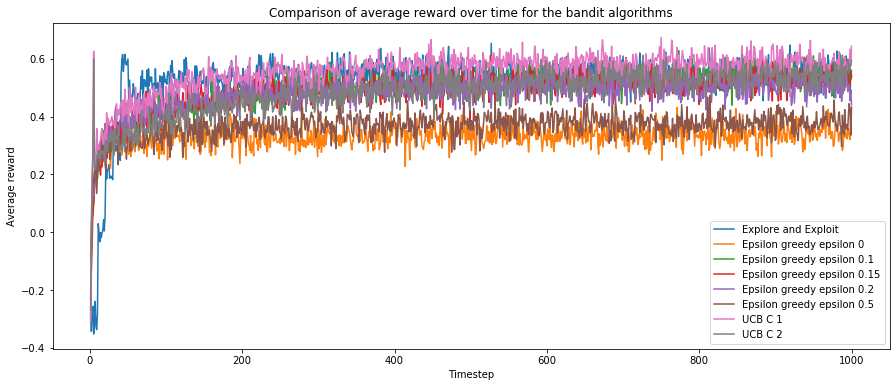

In [23]:
# Comparison of average rewards of the algorithms
fig = plt.figure(figsize = (15,6))
timesteps = np.arange(1,HORIZON+1)
reward1 = explore_exploit['rewards']
plt.plot(timesteps,reward1, label = 'Explore and Exploit')
reward2 = eps_rewards[0]
plt.plot(timesteps,reward2, label = "Epsilon greedy epsilon 0")
reward3 = eps_rewards[0.1]
plt.plot(timesteps,reward3, label = "Epsilon greedy epsilon 0.1")
reward4 = eps_rewards[0.15]
plt.plot(timesteps,reward4, label = "Epsilon greedy epsilon 0.15")
reward5 = eps_rewards[0.2]
plt.plot(timesteps,reward5, label = "Epsilon greedy epsilon 0.2")
reward6 = eps_rewards[0.5]
plt.plot(timesteps,reward6, label = "Epsilon greedy epsilon 0.5")
reward7 = ucb_c1['rewards']
plt.plot(timesteps,reward7, label = "UCB C 1")
reward8 = ucb_c2['rewards']
plt.plot(timesteps,reward8, label = "UCB C 2")

plt.xlabel("Timestep")
plt.ylabel("Average reward")
plt.title("Comparison of average reward over time for the bandit algorithms")
plt.legend()
plt.savefig('plots/1_a_reward_comparison.png')
plt.show()

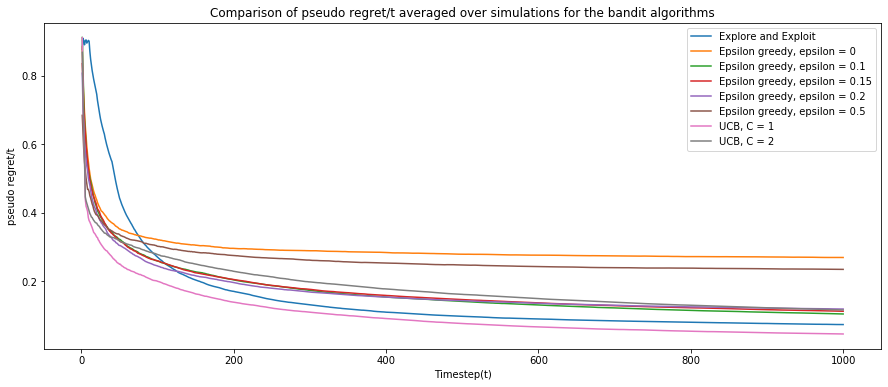

In [24]:
# Comparison of average pseudo regrets of the algorithms
fig = plt.figure(figsize = (15,6))
timesteps = np.arange(1,HORIZON+1)
regrets1 = explore_exploit['regrets']
plt.plot(timesteps,regrets1, label = 'Explore and Exploit')
regrets2 = eps_regrets[0]
plt.plot(timesteps,regrets2, label = "Epsilon greedy, epsilon = 0")
regrets3 = eps_regrets[0.1]
plt.plot(timesteps,regrets3, label = "Epsilon greedy, epsilon = 0.1")
regrets4 = eps_regrets[0.15]
plt.plot(timesteps,regrets4, label = "Epsilon greedy, epsilon = 0.15")
regrets5 = eps_regrets[0.2]
plt.plot(timesteps,regrets5, label = "Epsilon greedy, epsilon = 0.2")
regrets6 = eps_regrets[0.5]
plt.plot(timesteps,regrets6, label = "Epsilon greedy, epsilon = 0.5")
regrets7 = ucb_c1['regrets']
plt.plot(timesteps,regrets7, label = "UCB, C = 1")

regrets8 = ucb_c2['regrets']
plt.plot(timesteps,regrets8, label = "UCB, C = 2")

plt.xlabel("Timestep(t)")
plt.ylabel("pseudo regret/t")
plt.title("Comparison of pseudo regret/t averaged over simulations for the bandit algorithms")
plt.legend()
plt.savefig('plots/1_a_regret_comparison.png')
plt.show()

## 1.b) Average number of times an arm was chosen for the algorithms


In [25]:
def get_algorithm_arms_played(c):
    if c==0:
        label = "Explore and Exploit"
        avg_arms_played = explore_exploit['avg_arms_played']
    elif c==1:
        label = "Epsilon greedy with epsilon 0"
        avg_arms_played = eps_avg_arms_played[0]
    elif c==2:
        label = "Epsilon greedy with epsilon 0.1"
        avg_arms_played = eps_avg_arms_played[0.1]
    elif c==3:
        label = "Epsilon greedy with epsilon 0.15"
        avg_arms_played = eps_avg_arms_played[0.15]
    elif c==4:
        label = "Epsilon greedy with epsilon 0.2"
        avg_arms_played = eps_avg_arms_played[0.2]
    elif c==5:
        label = "Epsilon greedy with epsilon 0.5"
        avg_arms_played = eps_avg_arms_played[0.5]
    elif c==6:
        label = "UCB, C = 1"
        avg_arms_played = ucb_c1['avg_arms_played']
    elif c==7:
        label = "UCB, C = 2"
        avg_arms_played = ucb_c2['avg_arms_played']

    return (avg_arms_played, label)
    

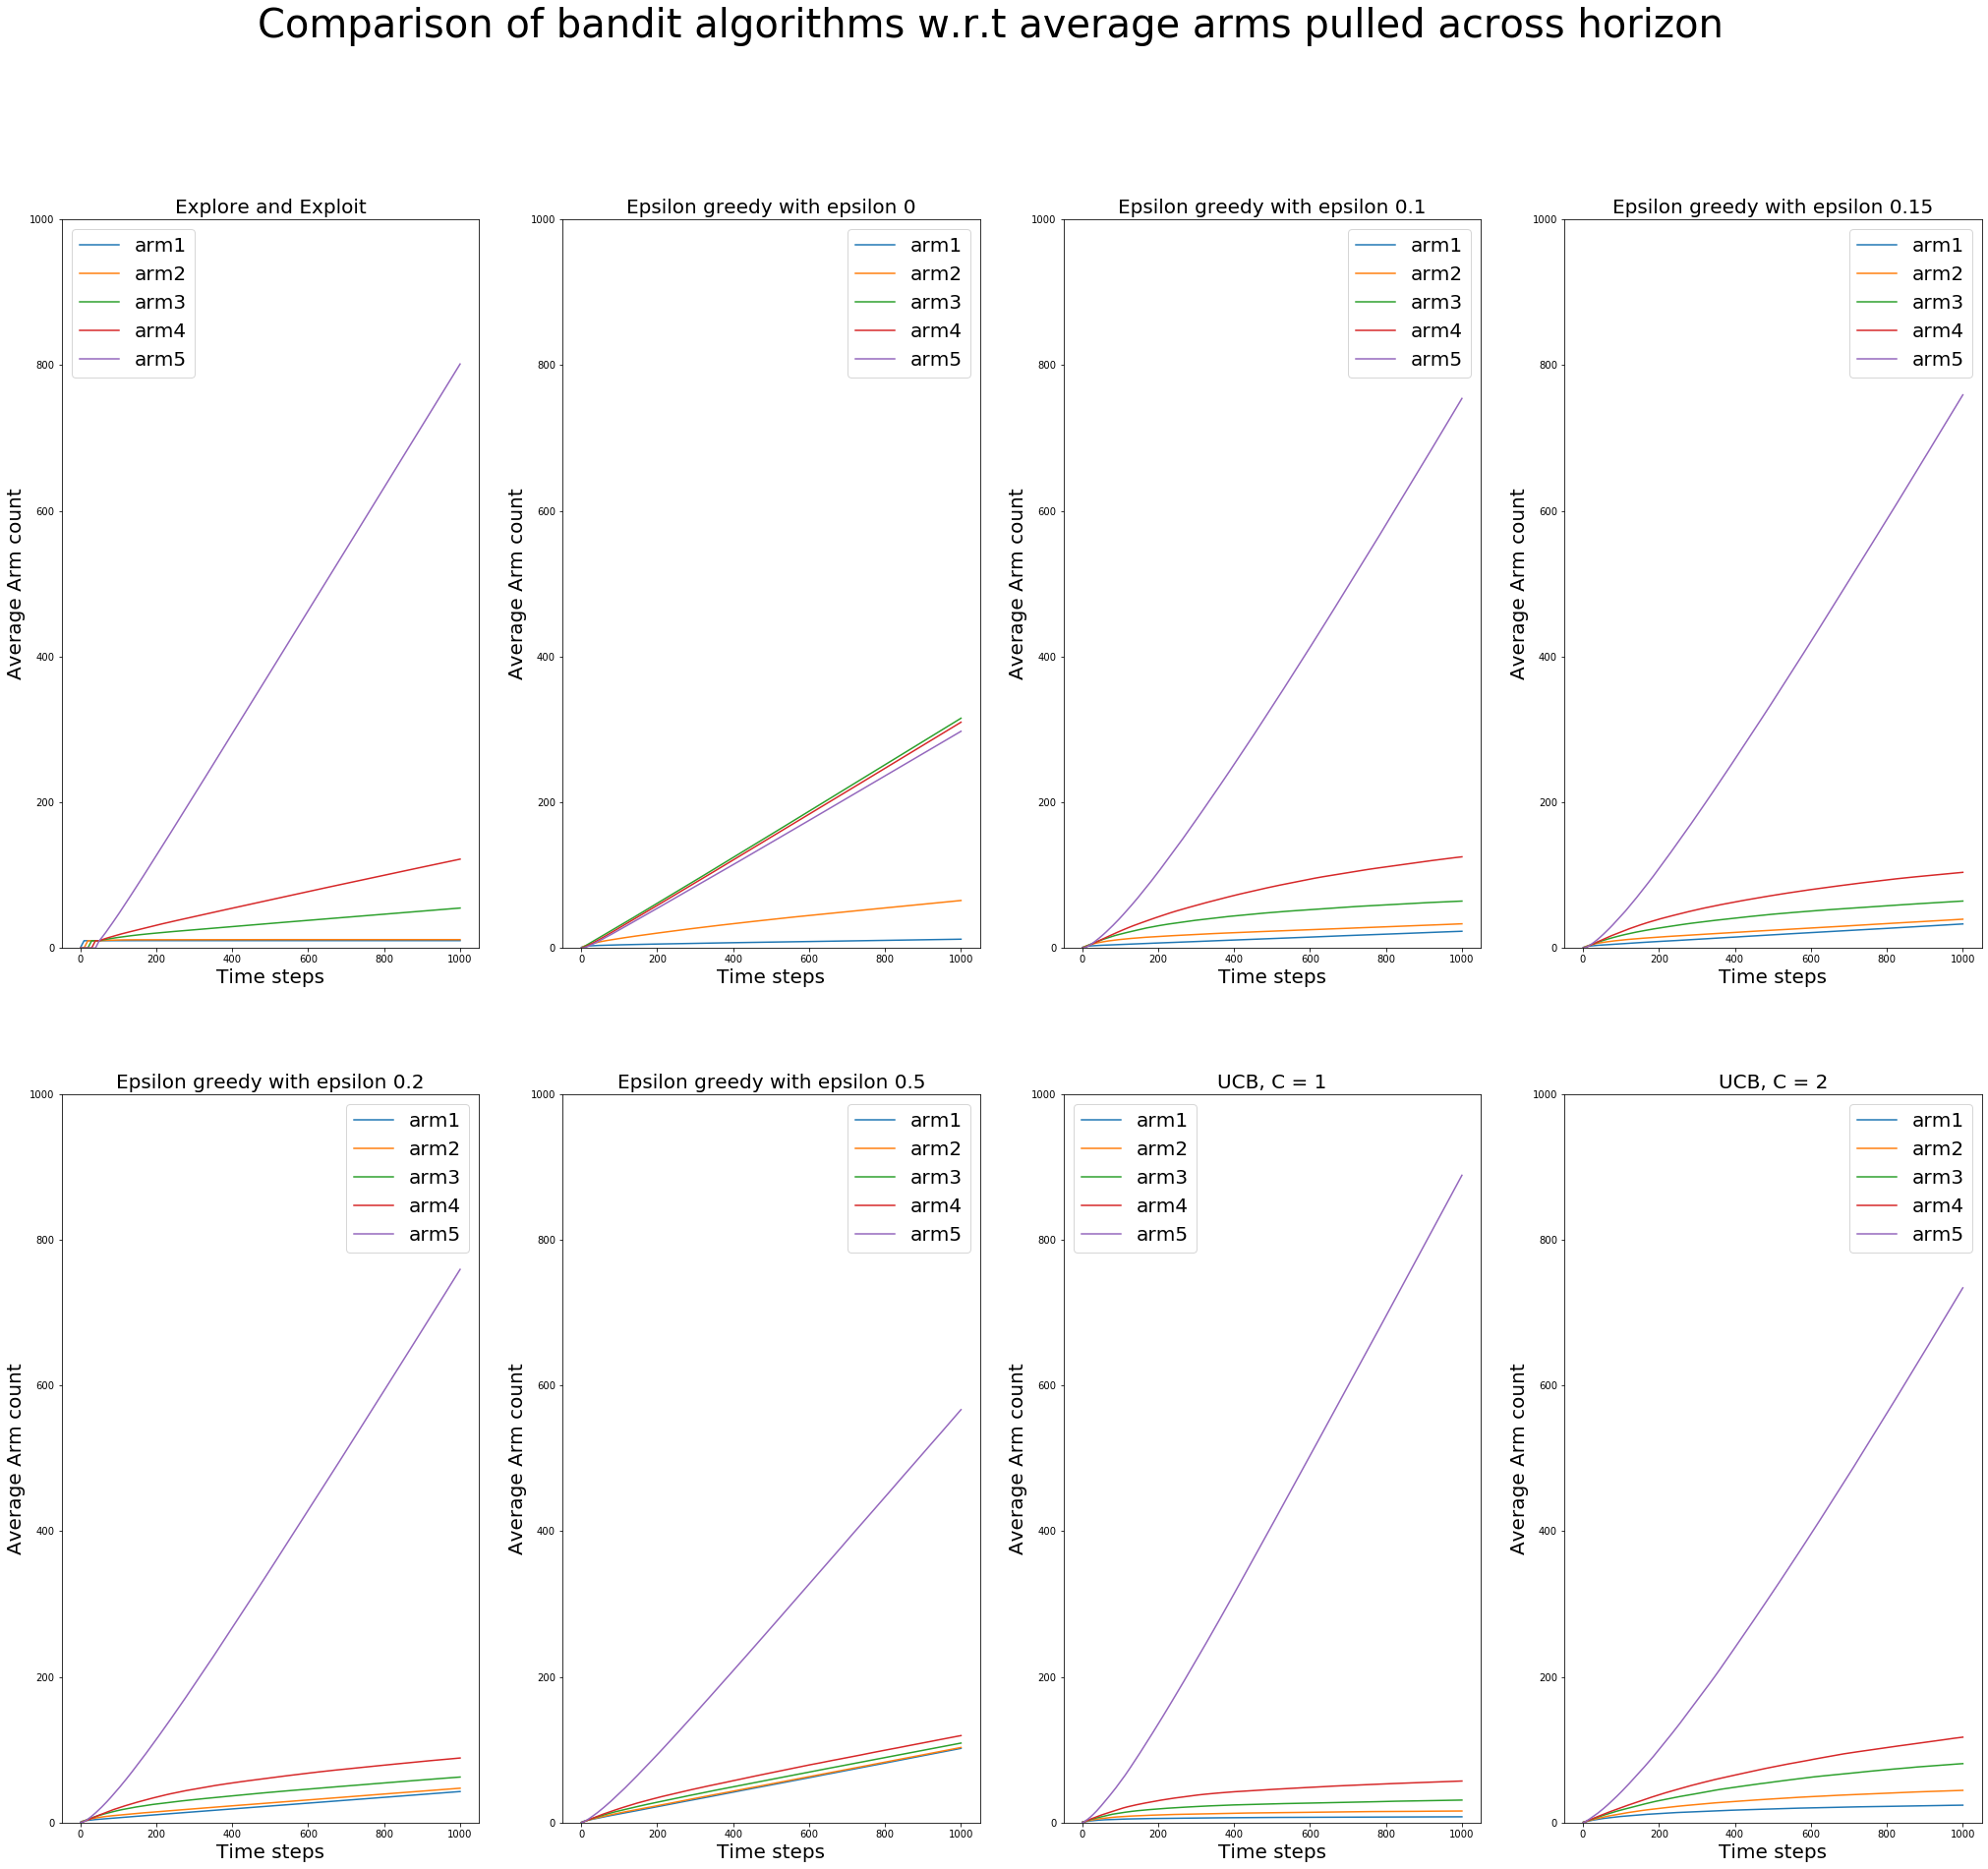

In [26]:
fig, axs = plt.subplots(2,4, figsize = (35,30))
timesteps = np.arange(1,HORIZON+1)

i = 0
j = 0
c = 0
while c<8:
    
    avg_arms_played, label = get_algorithm_arms_played(c)
    
    arm1 = avg_arms_played[0,:]
    arm2 = avg_arms_played[1,:]
    arm3 = avg_arms_played[2,:]
    arm4 = avg_arms_played[3,:]
    arm5 = avg_arms_played[4,:]

    axs[i,j].plot(timesteps, arm1, label = 'arm1')
    axs[i,j].plot(timesteps, arm2, label = 'arm2')
    axs[i,j].plot(timesteps, arm3, label = 'arm3')
    axs[i,j].plot(timesteps, arm4, label = 'arm4')
    axs[i,j].plot(timesteps, arm5, label = 'arm5')

    axs[i,j].set_xlabel("Time steps", fontsize = 20)
    axs[i,j].set_ylabel("Average Arm count", fontsize = 20)
    axs[i,j].set_title(label, fontsize = 20)
    axs[i,j].legend(fontsize = 20)
    
    axs[i,j].set_ylim(0,1000)
    j+=1
    if j==4:
        i+=1
        j=0
    c+=1
    

plt.suptitle("Comparison of bandit algorithms w.r.t average arms pulled across horizon", fontsize = 40)
plt.savefig('plots/1_b.Avg_arm_count_comparison.png')
plt.show()

## 1.c) Comparison of number of times optimal arm was chosen

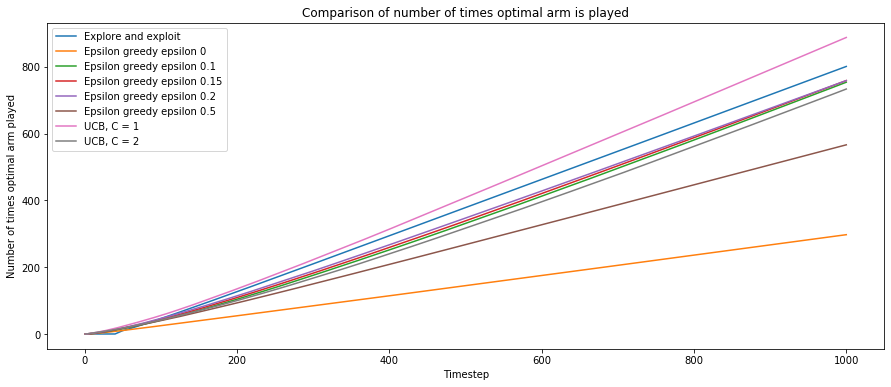

In [27]:
# Comparison of number of times optimal arm was chosen
fig = plt.figure(figsize = (15,6))
timesteps = np.arange(1,HORIZON+1)
arms_chosen1 = explore_exploit['avg_arms_played'][4,:].copy()
arms_chosen2 = eps_avg_arms_played[0][4,:].copy()
arms_chosen3 = eps_avg_arms_played[0.1][4,:].copy()
arms_chosen4 = eps_avg_arms_played[0.15][4,:].copy()
arms_chosen5 = eps_avg_arms_played[0.2][4,:].copy()
arms_chosen6 = eps_avg_arms_played[0.5][4,:].copy()
arms_chosen7 = ucb_c1['avg_arms_played'][4,:].copy()
arms_chosen8 = ucb_c2['avg_arms_played'][4,:].copy()

plt.plot(timesteps,arms_chosen1, label = "Explore and exploit")
plt.plot(timesteps,arms_chosen2, label = "Epsilon greedy epsilon 0")
plt.plot(timesteps,arms_chosen3, label = "Epsilon greedy epsilon 0.1")
plt.plot(timesteps,arms_chosen4, label = "Epsilon greedy epsilon 0.15")
plt.plot(timesteps,arms_chosen5, label = "Epsilon greedy epsilon 0.2")
plt.plot(timesteps,arms_chosen6, label = "Epsilon greedy epsilon 0.5")
plt.plot(timesteps,arms_chosen7, label = "UCB, C = 1")
plt.plot(timesteps,arms_chosen8, label = "UCB, C = 2")

plt.xlabel("Timestep")
plt.ylabel("Number of times optimal arm played")
plt.title("Comparison of number of times optimal arm is played")
plt.legend()
plt.savefig('plots/1_c_Optimal_arm_chosen_comparison.png')
plt.show()

From the graphs above, it is evident that the UCB algorithm with C=1 value is performing the best and the epsilon greedy with epsilon 0 (greedy algorithm) is performing the worst which is expected. The performance of epsilon greedy with epsilons 0.1, 0.15 and 0.2 and UCB with C=2 are doing similarly while explore and exploit is doing the second best and epsilon greedy with epsilon 0.5 is doing the second worst.

## epsilon-greedy with decaying epsilon

In [28]:
def choose_arm_decaying_eps_greedy(expected_rewards, epsilon,T):
    choice = np.random.uniform(0,1)
    
    epsilon_t = epsilon/np.sqrt(T)
    
    explore = choice < epsilon_t
    
    if explore==False:
        return np.argmax(expected_rewards)
    else:
        i = random.choice(np.arange(n_arms))
        
        return i

In [29]:
def decaying_epsilon_greedy(epsilon):
    sum_rewards = [0]*len(arm_means)
    expected_rewards = [0]* len(arm_means)
    
    Nts = [0]*len(arm_means)
    number_arms_played = np.zeros((HORIZON, n_arms))
    
    regrets = []
    rewards = []
    cumulative_reward = 0
    cumulative_regret = 0
    
    for T in range(1,HORIZON+1):
        r = 0
        
        #choose arm
        arm = choose_arm_decaying_eps_greedy(expected_rewards,epsilon,T)       
        r = get_reward(arm)

        cumulative_reward +=r
        
        #rewards.append(cumulative_reward/T)
        rewards.append(r)
        
        sum_rewards[arm] += r
        Nts[arm] +=1
        expected_rewards[arm] = sum_rewards[arm]/Nts[arm]
        
        for arm in range(n_arms):
            number_arms_played[T-1,arm] = Nts[arm]
            
        pseudo_regret = arm_means[OPTIMAL_ARM] - r
        cumulative_regret += pseudo_regret
        
        pseudo_regret_t = cumulative_regret/T

        
        regrets.append(pseudo_regret_t)
        
    return (rewards, regrets, number_arms_played)

In [30]:
def test_decaying_epsilon_greedy(epsilon, n_sims = 1000):
    sim_rewards = []
    sim_regrets = []
    sim_number_arms_played = []
    for sim in range(n_sims):
        rewards, regrets, number_arms_played = decaying_epsilon_greedy(epsilon)
        sim_rewards.append(rewards)
        sim_regrets.append(regrets)
        sim_number_arms_played.append(number_arms_played)
        
    sim_rewards = np.array(sim_rewards)
    sim_regrets = np.array(sim_regrets)
    sim_number_arms_played = np.array(sim_number_arms_played)
    
    avg_rewards = np.mean(sim_rewards, axis = 0)
    avg_regrets = np.mean(sim_regrets, axis = 0)
    
    #print (sim_rewards.shape, sim_regrets.shape, sim_number_arms_played.shape)
    
    avg_arms_played = []
    for arm in range(n_arms):
        sims_arm_played_t = sim_number_arms_played[:,:,arm]
        avg_arm_played_t = np.mean(sims_arm_played_t, axis = 0)
        
        avg_arms_played.append(avg_arm_played_t)
        
    avg_arms_played = np.array(avg_arms_played)
    #print (avg_arms_played.shape)
       
    return (avg_rewards, avg_regrets, avg_arms_played)

In [31]:
rewards, regrets, avg_arms_played = test_decaying_epsilon_greedy(epsilon = 0.6)
decaying_eps = {}
decaying_eps['rewards'] = rewards
decaying_eps['regrets'] = regrets
decaying_eps['avg_arms_played'] = avg_arms_played

## 2) Comparison of decaying epsilon greedy with UCB 

**a) Average Reward and Average Pseudo Regret Comparison**

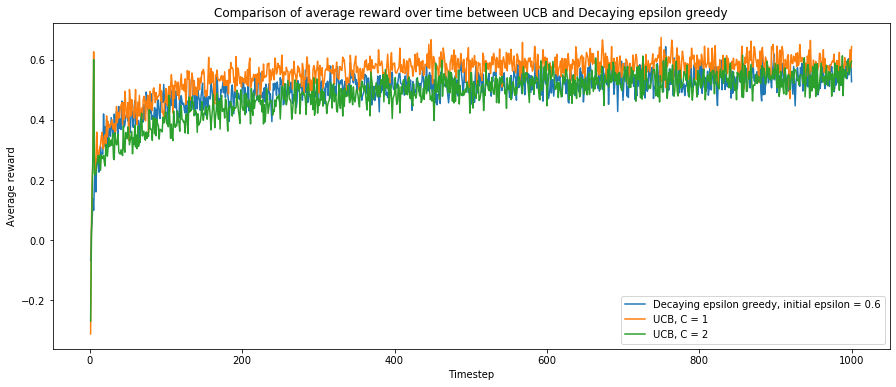

In [33]:
fig = plt.figure(figsize = (15,6))
timesteps = np.arange(1,HORIZON+1)
reward1 = decaying_eps['rewards']
plt.plot(timesteps,reward1, label = 'Decaying epsilon greedy, initial epsilon = 0.6')
reward2 = ucb_c1['rewards']
plt.plot(timesteps,reward2, label = "UCB, C = 1")
reward3 = ucb_c2['rewards']
plt.plot(timesteps, reward3, label = "UCB, C = 2")

plt.xlabel("Timestep")
plt.ylabel("Average reward")
plt.title("Comparison of average reward over time between UCB and Decaying epsilon greedy")
plt.legend()
plt.savefig('plots/2_a_reward_comparison.png')
plt.show()

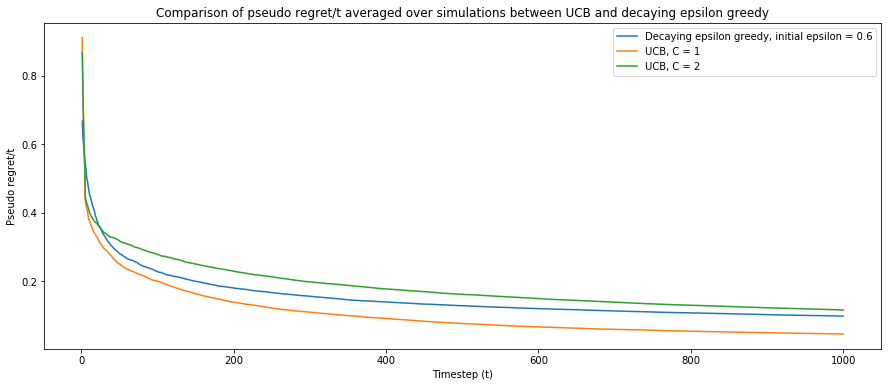

In [34]:
 # Comparison of average pseudo regrets of the algorithms
fig = plt.figure(figsize = (15,6))
timesteps = np.arange(1,HORIZON+1)
regrets1 = decaying_eps['regrets']
plt.plot(timesteps,regrets1, label = 'Decaying epsilon greedy, initial epsilon = 0.6')
regrets2 = ucb_c1['regrets']
plt.plot(timesteps,regrets2, label = "UCB, C = 1")
regrets3 = ucb_c2['regrets']
plt.plot(timesteps,regrets3, label = "UCB, C = 2")
plt.xlabel("Timestep (t)")
plt.ylabel("Pseudo regret/t")
plt.title("Comparison of pseudo regret/t averaged over simulations between UCB and decaying epsilon greedy")
plt.legend()
#plt.ylim(0.4,0.7)
#plt.xlim(0,100)
plt.savefig('plots/2_a_regret_comparison.png')
plt.show()

**b) Comparison of average arms played between UCB and decaying epsilon greedy** 

In [35]:
def get_algorithm_arms_played(c):
    if c==0:
        avg_arms_played = decaying_eps['avg_arms_played']
        label = "Decaying epsilon greedy, initial epsilon = 0.6"
    if c==1:
        avg_arms_played = ucb_c1['avg_arms_played']
        label = "UCB, C = 1"
    else:
        avg_arms_played = ucb_c2['avg_arms_played']
        label = "UCB, C = 2"
        
    return (avg_arms_played, label)

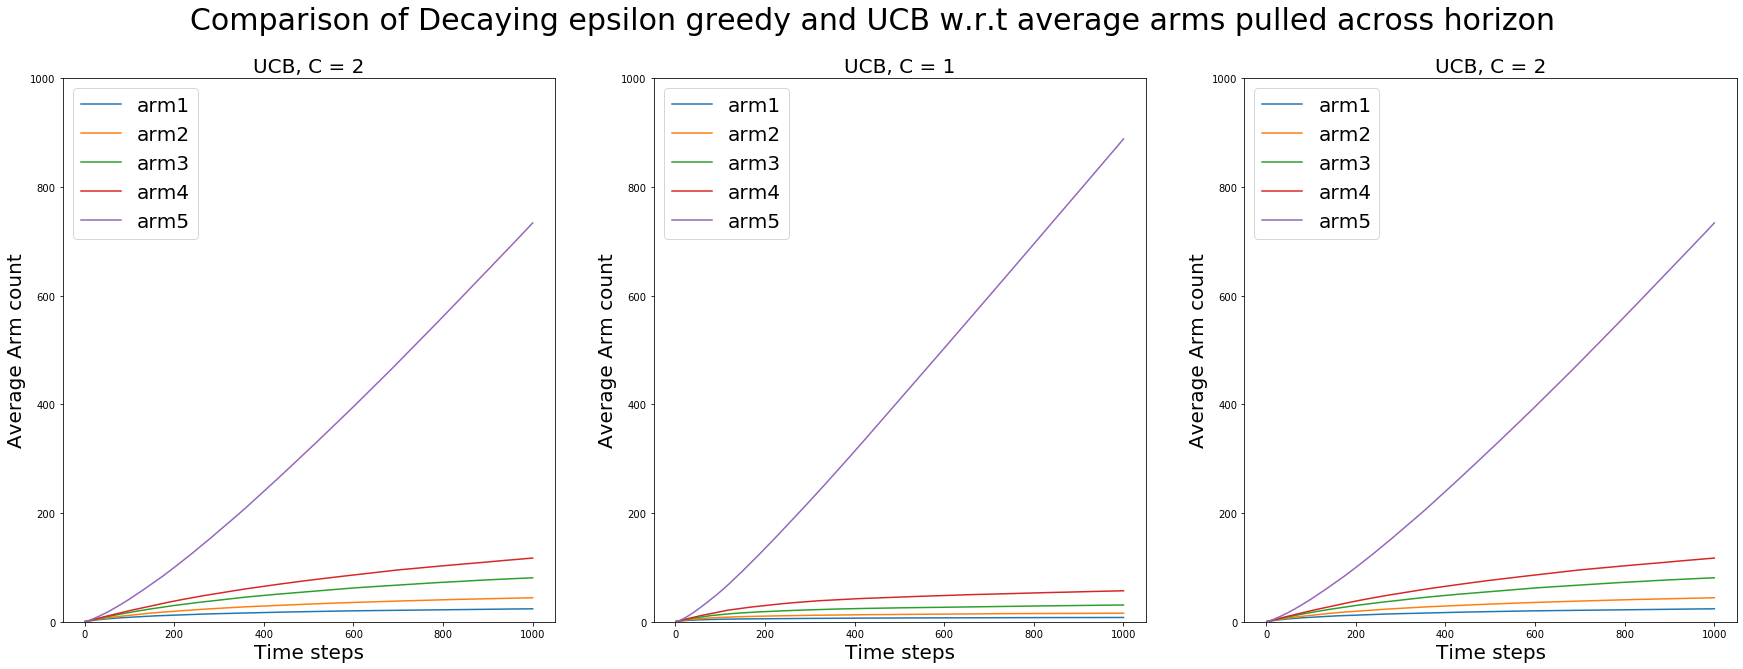

In [36]:
fig, axs = plt.subplots(1,3, figsize = (30,10))
timesteps = np.arange(1,HORIZON+1)

i = 0
c = 0
while c<3:
    
    avg_arms_played, label = get_algorithm_arms_played(c)
    
    arm1 = avg_arms_played[0,:]
    arm2 = avg_arms_played[1,:]
    arm3 = avg_arms_played[2,:]
    arm4 = avg_arms_played[3,:]
    arm5 = avg_arms_played[4,:]

    axs[c].plot(timesteps, arm1, label = 'arm1')
    axs[c].plot(timesteps, arm2, label = 'arm2')
    axs[c].plot(timesteps, arm3, label = 'arm3')
    axs[c].plot(timesteps, arm4, label = 'arm4')
    axs[c].plot(timesteps, arm5, label = 'arm5')

    axs[c].set_ylim(0,HORIZON)
    axs[c].set_xlabel("Time steps", fontsize = 20)
    axs[c].set_ylabel("Average Arm count", fontsize = 20)
    axs[c].set_title(label, fontsize = 20)
    axs[c].legend(fontsize = 20)
        
    c+=1
    


plt.suptitle("Comparison of Decaying epsilon greedy and UCB w.r.t average arms pulled across horizon", fontsize = 30)
plt.savefig('plots/2_b.Avg_arm_count_comparison.png')
plt.show()

**c) Comparison of number of times optimal arm is chosen over horizon**

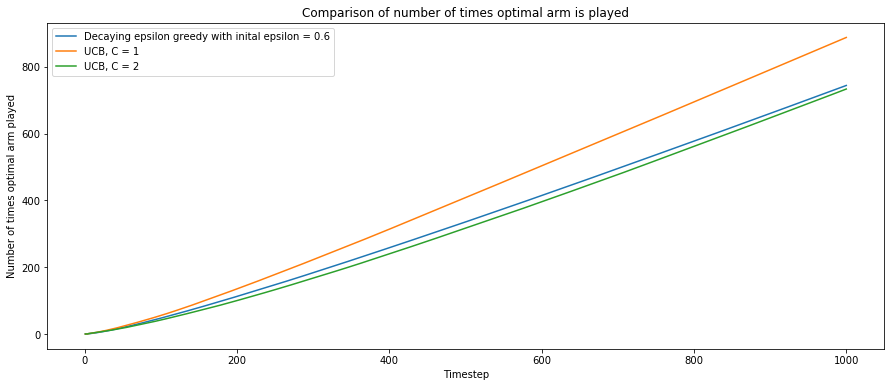

In [37]:
# Comparison of number of times optimal arm was chosen
fig = plt.figure(figsize = (15,6))
timesteps = np.arange(1,HORIZON+1)
arms_chosen1 = decaying_eps['avg_arms_played'][4,:]
arms_chosen2 = ucb_c1['avg_arms_played'][4,:]
arms_chosen3 = ucb_c2['avg_arms_played'][4,:]

plt.plot(timesteps,arms_chosen1, label = "Decaying epsilon greedy with inital epsilon = 0.6")
plt.plot(timesteps,arms_chosen2, label = "UCB, C = 1")
plt.plot(timesteps, arms_chosen3, label = "UCB, C = 2")

plt.xlabel("Timestep")
plt.ylabel("Number of times optimal arm played")
plt.title("Comparison of number of times optimal arm is played")
plt.legend()
plt.savefig('plots/2_c_Optimal_arm_chosen_comparison.png')
plt.show()

From the graphs as above, it is evident that UCB algorithm with C=1 is performing the best followed by decaying epsilon greedy with initial epsilon as 0.6 and finally UCB algorithm with c=2.

## Gradient Bandits

In [38]:
def update_prob_action(preferences):
    pi_a = [0]*n_arms
    exp_preferences = [np.exp(x) for x in preferences]
    s = np.sum(exp_preferences)
    
    for i in range(n_arms):
        pi_a[i] = exp_preferences[i]/s
        
    return pi_a

In [39]:
def choose_arm_gb(pi_a):
    choice = np.random.choice(np.arange(n_arms), p = pi_a)
    return choice
        

In [40]:
def update_preferences(arm_played, preferences, pi_a, reward, baseline=0, alpha=0.1):
    new_preference = preferences.copy()
    
    for action in range(n_arms):
        if action == arm_played:
            new_preference[action] = preferences[action] + (alpha* (reward - baseline) * (1 - pi_a[arm_played]))
        else:
            new_preference[action] = preferences[action] - (alpha* (reward - baseline) * pi_a[action])
    
    return new_preference

In [41]:
def gradient_bandits(alpha=0.1, include_baseline = False):
    
    preferences = [0]*n_arms
    pi_a = update_prob_action(preferences)
    
    Nts = [0]*n_arms
    number_arms_played = np.zeros((HORIZON, n_arms))
    
    regrets = []
    rewards = []
    cumulative_reward = 0
    cumulative_regret = 0
    
    for T in range(1,HORIZON+1):
        arm = choose_arm_gb(pi_a)
        r = get_reward(arm)
        
        
        cumulative_reward +=r
        
        #rewards.append(cumulative_reward/T)
        rewards.append(r)
        
        Nts[arm] +=1
        
        if include_baseline == False:
            baseline = 0
        else:
            baseline = cumulative_reward/T
            
        preferences = update_preferences(arm_played = arm, preferences = preferences, pi_a = pi_a,
                                         reward = r, baseline=baseline, alpha=alpha)
        pi_a = update_prob_action(preferences)

        for arm in range(n_arms):
            number_arms_played[T-1,arm] = Nts[arm]
            
        pseudo_regret = (arm_means[OPTIMAL_ARM]) - r
        cumulative_regret += pseudo_regret
        pseudo_regret_t = cumulative_regret/T

        
        regrets.append(pseudo_regret_t)
        
        
        
        
    return (rewards, regrets, number_arms_played)
    

In [42]:
def test_gradient_bandit(alpha, include_baseline, n_sims = 1000):
    
    sim_rewards = []
    sim_regrets = []
    sim_number_arms_played = []
    
    for sim in range(n_sims):
        rewards, regrets, number_arms_played = gradient_bandits(alpha=alpha, include_baseline = include_baseline)
        sim_rewards.append(rewards)
        sim_regrets.append(regrets)
        sim_number_arms_played.append(number_arms_played)
        
    sim_rewards = np.array(sim_rewards)
    sim_regrets = np.array(sim_regrets)
    sim_number_arms_played = np.array(sim_number_arms_played)
    
    avg_rewards = np.mean(sim_rewards, axis = 0)
    avg_regrets = np.mean(sim_regrets, axis = 0)
    
    #print (sim_rewards.shape, sim_regrets.shape, sim_number_arms_played.shape)
    
    avg_arms_played = []
    for arm in range(n_arms):
        sims_arm_played_t = sim_number_arms_played[:,:,arm]
        avg_arm_played_t = np.mean(sims_arm_played_t, axis = 0)
        
        avg_arms_played.append(avg_arm_played_t)
        
    avg_arms_played = np.array(avg_arms_played)
    #print (avg_arms_played.shape)
       
    return (avg_rewards, avg_regrets, avg_arms_played)

In [43]:
rewards, regrets, avg_arms_played = test_gradient_bandit(alpha = 0.1,include_baseline = False)
gradient_bandits_wo_baseline = {}
gradient_bandits_wo_baseline['rewards'] = rewards
gradient_bandits_wo_baseline['regrets'] = regrets
gradient_bandits_wo_baseline['avg_arms_played'] = avg_arms_played

In [44]:
rewards, regrets, avg_arms_played = test_gradient_bandit(alpha = 0.1,include_baseline = True)
gradient_bandits_baseline = {}
gradient_bandits_baseline['rewards'] = rewards
gradient_bandits_baseline['regrets'] = regrets
gradient_bandits_baseline['avg_arms_played'] = avg_arms_played

**Comparison of Gradient Bandits with and without baseline for given bandit rewards**

**a) Reward and Regret Comparison** 

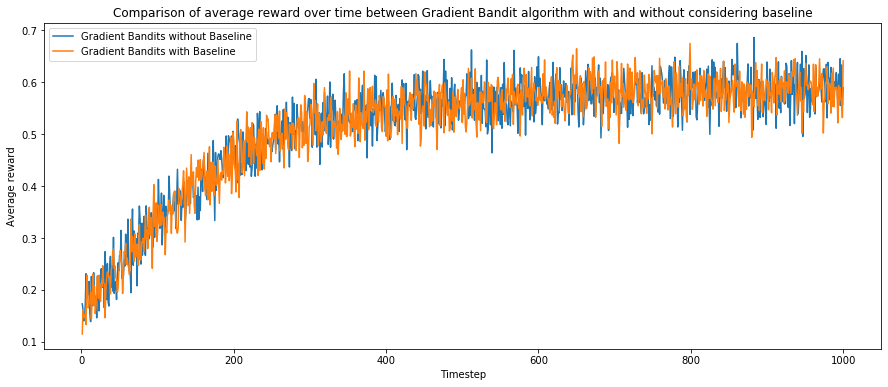

In [45]:
fig = plt.figure(figsize = (15,6))
timesteps = np.arange(1,HORIZON+1)
reward1 = gradient_bandits_wo_baseline['rewards']
plt.plot(timesteps,reward1, label = 'Gradient Bandits without Baseline')
reward2 = gradient_bandits_baseline['rewards']
plt.plot(timesteps,reward2, label = "Gradient Bandits with Baseline")
plt.xlabel("Timestep")
plt.ylabel("Average reward")
plt.title("Comparison of average reward over time between Gradient Bandit algorithm with and without considering baseline")
plt.legend()
plt.show()

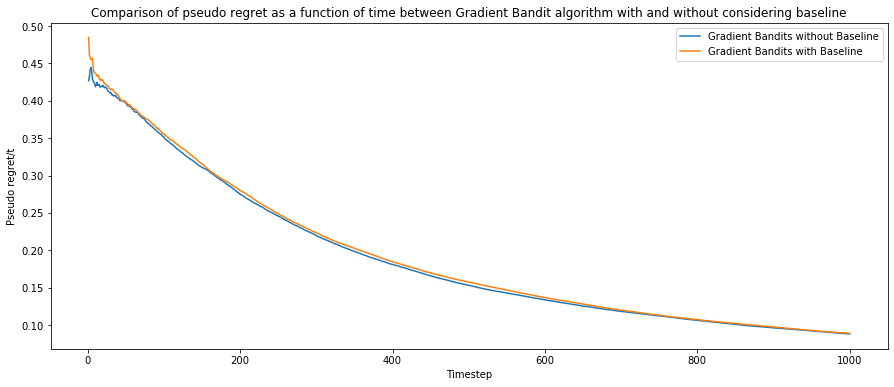

In [46]:
fig = plt.figure(figsize = (15,6))
timesteps = np.arange(1,HORIZON+1)
regrets1 = gradient_bandits_wo_baseline['regrets']
plt.plot(timesteps,regrets1, label = 'Gradient Bandits without Baseline')
regrets2 = gradient_bandits_baseline['regrets']
plt.plot(timesteps,regrets2, label = "Gradient Bandits with Baseline")
plt.xlabel("Timestep")
plt.ylabel("Pseudo regret/t")
plt.title("Comparison of pseudo regret as a function of time between Gradient Bandit algorithm with and without considering baseline")
plt.legend()
plt.show()

**b) Average arms played comparison**

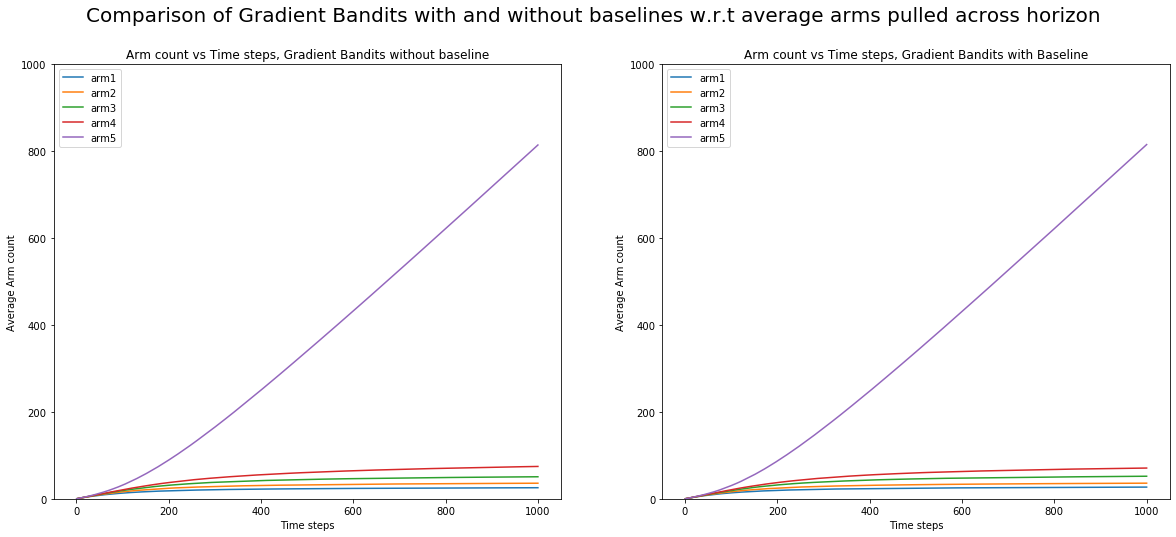

In [47]:
fig, axs = plt.subplots (1, 2, figsize = (20,8))
timesteps = np.arange(1,HORIZON+1)

for i in range(2):
    if i==0:
        label = "Gradient Bandits without baseline"
        avg_arms_played = gradient_bandits_wo_baseline['avg_arms_played']
    else:
        label = "Gradient Bandits with Baseline"
        avg_arms_played = gradient_bandits_baseline['avg_arms_played']
        
    arm1 = avg_arms_played[0,:]
    arm2 = avg_arms_played[1,:]
    arm3 = avg_arms_played[2,:]
    arm4 = avg_arms_played[3,:]
    arm5 = avg_arms_played[4,:]

    axs[i].plot(timesteps, arm1, label = 'arm1')
    axs[i].plot(timesteps, arm2, label = 'arm2')
    axs[i].plot(timesteps, arm3, label = 'arm3')
    axs[i].plot(timesteps, arm4, label = 'arm4')
    axs[i].plot(timesteps, arm5, label = 'arm5')

    axs[i].set_xlabel("Time steps")
    axs[i].set_ylabel("Average Arm count")
    axs[i].set_title("Arm count vs Time steps, {}".format(label))
    axs[i].set_ylim(0,HORIZON)
    axs[i].legend()
    
plt.suptitle("Comparison of Gradient Bandits with and without baselines w.r.t average arms pulled across horizon", fontsize = 20)
    
plt.show()

**c) Comparison of number of times optimal arm was chosen**

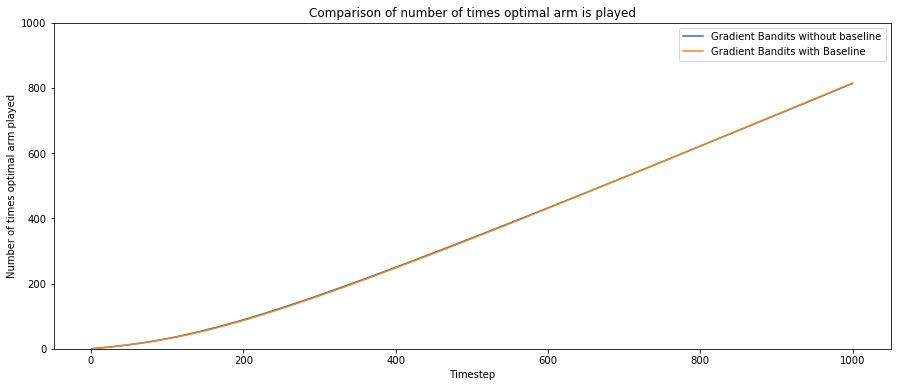

In [48]:
# Comparison of number of times optimal arm was chosen
fig = plt.figure(figsize = (15,6))
timesteps = np.arange(1,HORIZON+1)
arms_chosen1 = gradient_bandits_wo_baseline['avg_arms_played'][4,:]
arms_chosen2 = gradient_bandits_baseline['avg_arms_played'][4,:]

plt.plot(timesteps,arms_chosen1, label = "Gradient Bandits without baseline")
plt.plot(timesteps,arms_chosen2, label = "Gradient Bandits with Baseline")


plt.xlabel("Timestep")
plt.ylabel("Number of times optimal arm played")
plt.title("Comparison of number of times optimal arm is played")
plt.legend()
plt.ylim(0,HORIZON)
plt.show()

While there does not seem to be much difference between gradient bandits with and without baseline for these 5 arms having true mean rewards of -0.3, 0, 0.2, 0.3 and 0.6, the difference becomes apparent when we shift these rewards by 4 to have new true mean rewards of -3.7, 4, 4.2, 4.3, 4.6 respectively. Then, the gradient bandit algorithm with baseline does significantly better than the one without baseline as is shown below: 

In [49]:
arm_means = [(x+4) for x in arm_means]
OPTIMAL_ARM = np.argmax(arm_means)
arm_means, OPTIMAL_ARM

([3.7, 4.0, 4.2, 4.3, 4.6], 4)

## 3) Comparison of Gradient Bandit with and without Baseline

**As we saw above, for the arms following normal distribution with true means -0.3, 0, 0.2, 0.3 and 0.6 respectively with unit variance, there was not much difference in performance between Gradient Bandit with no baseline and Gradient Bandit with Baseline algorithms. However, the difference becomes really noticeable, when the rewards are shifted. So, here I am shifting the mean rewards by 4. So, now the arms follow normal distribution with true means -3.7, 4.0, 4.2, 4.3 and 4.6  respectively. The variance is still 1.**

In [50]:
rewards, regrets, avg_arms_played = test_gradient_bandit(alpha = 0.1,include_baseline = False)
gradient_bandits_wo_baseline = {}
gradient_bandits_wo_baseline['rewards'] = rewards
gradient_bandits_wo_baseline['regrets'] = regrets
gradient_bandits_wo_baseline['avg_arms_played'] = avg_arms_played

In [51]:
rewards, regrets, avg_arms_played = test_gradient_bandit(alpha = 0.1,include_baseline = True)
gradient_bandits_baseline = {}
gradient_bandits_baseline['rewards'] = rewards
gradient_bandits_baseline['regrets'] = regrets
gradient_bandits_baseline['avg_arms_played'] = avg_arms_played

### a) Reward and Regret Comparison

**Reward Comparison**

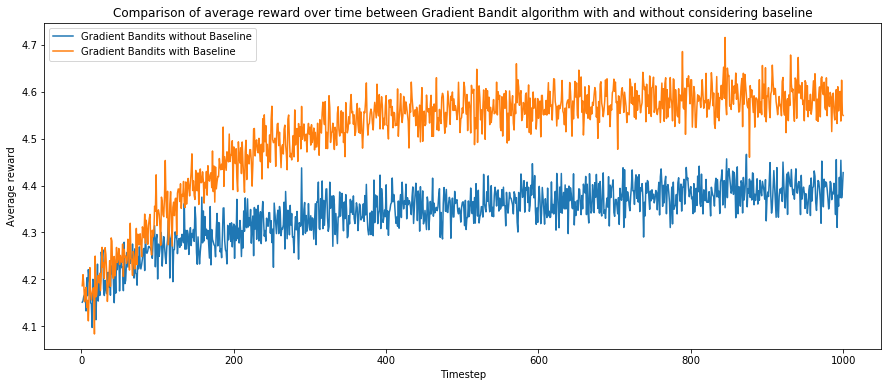

In [52]:
fig = plt.figure(figsize = (15,6))
timesteps = np.arange(1,HORIZON+1)
reward1 = gradient_bandits_wo_baseline['rewards']
plt.plot(timesteps,reward1, label = 'Gradient Bandits without Baseline')
reward2 = gradient_bandits_baseline['rewards']
plt.plot(timesteps,reward2, label = "Gradient Bandits with Baseline")
plt.xlabel("Timestep")
plt.ylabel("Average reward")
plt.title("Comparison of average reward over time between Gradient Bandit algorithm with and without considering baseline")
plt.legend()
plt.savefig('plots/3_a_reward_comparison.png')
plt.show()

**Regret Comparison**

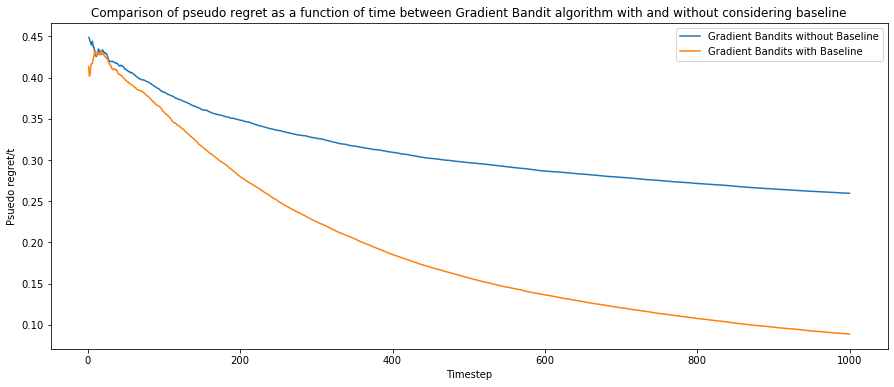

In [53]:
fig = plt.figure(figsize = (15,6))
timesteps = np.arange(1,HORIZON+1)
regrets1 = gradient_bandits_wo_baseline['regrets']
plt.plot(timesteps,regrets1, label = 'Gradient Bandits without Baseline')
regrets2 = gradient_bandits_baseline['regrets']
plt.plot(timesteps,regrets2, label = "Gradient Bandits with Baseline")
plt.xlabel("Timestep")
plt.ylabel("Psuedo regret/t")
plt.title("Comparison of pseudo regret as a function of time between Gradient Bandit algorithm with and without considering baseline")
plt.legend()
plt.savefig('plots/3_a_regret_comparison.png')
plt.show()

### b) Arm count Comparison

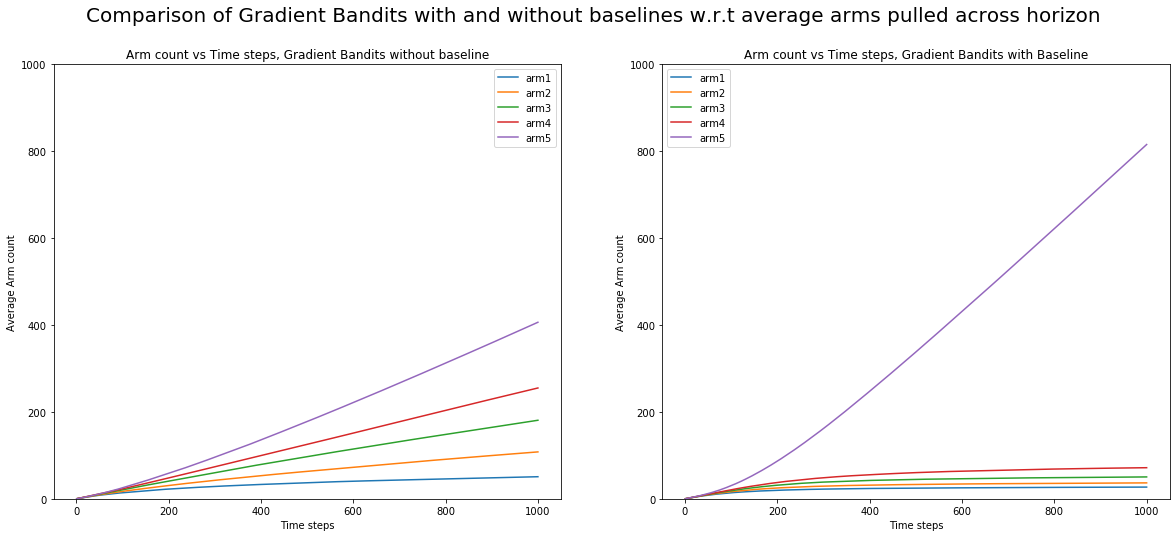

In [54]:
fig, axs = plt.subplots (1, 2, figsize = (20,8))
timesteps = np.arange(1,HORIZON+1)

for i in range(2):
    if i==0:
        label = "Gradient Bandits without baseline"
        avg_arms_played = gradient_bandits_wo_baseline['avg_arms_played']
    else:
        label = "Gradient Bandits with Baseline"
        avg_arms_played = gradient_bandits_baseline['avg_arms_played']
        
    arm1 = avg_arms_played[0,:]
    arm2 = avg_arms_played[1,:]
    arm3 = avg_arms_played[2,:]
    arm4 = avg_arms_played[3,:]
    arm5 = avg_arms_played[4,:]

    axs[i].plot(timesteps, arm1, label = 'arm1')
    axs[i].plot(timesteps, arm2, label = 'arm2')
    axs[i].plot(timesteps, arm3, label = 'arm3')
    axs[i].plot(timesteps, arm4, label = 'arm4')
    axs[i].plot(timesteps, arm5, label = 'arm5')

    axs[i].set_xlabel("Time steps")
    axs[i].set_ylabel("Average Arm count")
    axs[i].set_title("Arm count vs Time steps, {}".format(label))
    axs[i].set_ylim(0,HORIZON)
    axs[i].legend()
    
plt.suptitle("Comparison of Gradient Bandits with and without baselines w.r.t average arms pulled across horizon", fontsize = 20)
plt.savefig('plots/3_b.Avg_arm_count_comparison.png')
    
plt.show()

### c) Optimal Arm played comparison

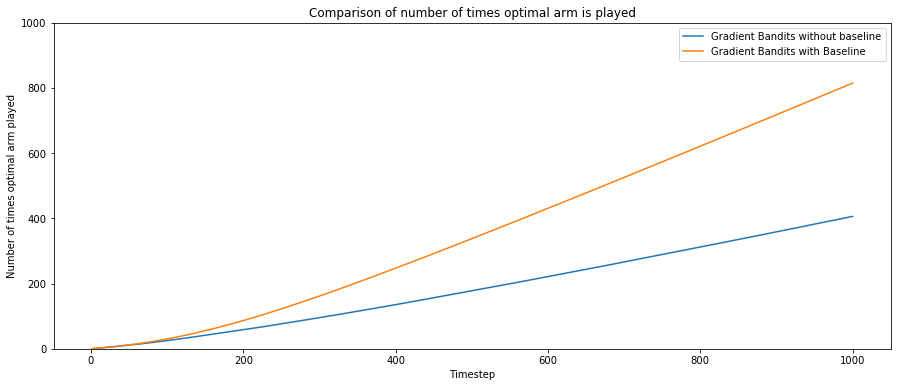

In [55]:
# Comparison of number of times optimal arm was chosen
fig = plt.figure(figsize = (15,6))
timesteps = np.arange(1,HORIZON+1)
arms_chosen1 = gradient_bandits_wo_baseline['avg_arms_played'][4,:]
arms_chosen2 = gradient_bandits_baseline['avg_arms_played'][4,:]

plt.plot(timesteps,arms_chosen1, label = "Gradient Bandits without baseline")
plt.plot(timesteps,arms_chosen2, label = "Gradient Bandits with Baseline")


plt.xlabel("Timestep")
plt.ylabel("Number of times optimal arm played")
plt.title("Comparison of number of times optimal arm is played")
plt.legend()
plt.ylim(0,HORIZON)
plt.savefig('plots/3_c_Optimal_arm_chosen_comparison.png')
plt.show()